In [1]:
# !pip install pandas numpy scikit-learn matplotlib imblearn seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, ConfusionMatrixDisplay
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE


In [3]:
DATA_PATH = "diabetes_prediction_dataset.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
TARGET = "diabetes"
X = df.drop(columns=[TARGET])
y = df[TARGET]

categorical_cols = ["gender", "smoking_history"]
numeric_cols = [
    "age", "bmi", "HbA1c_level",
    "blood_glucose_level", "hypertension", "heart_disease"
]

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

models = {
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

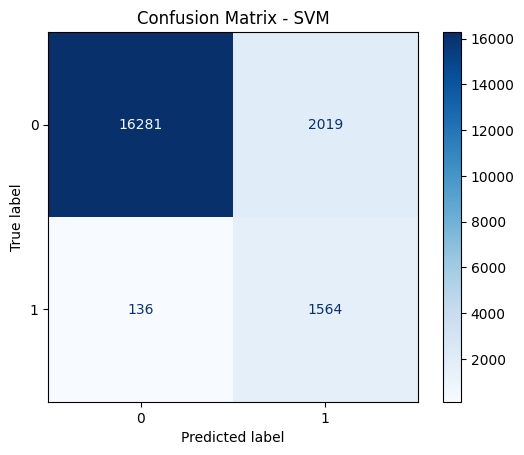

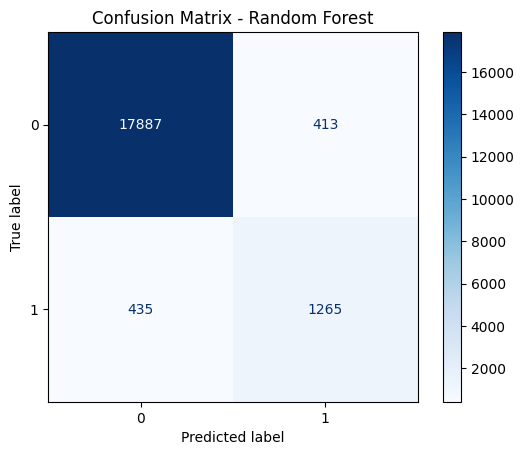

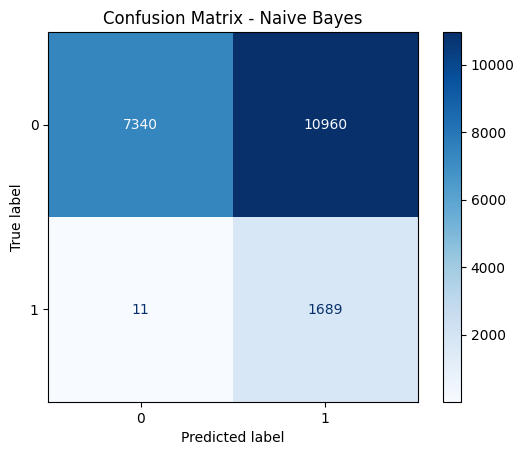

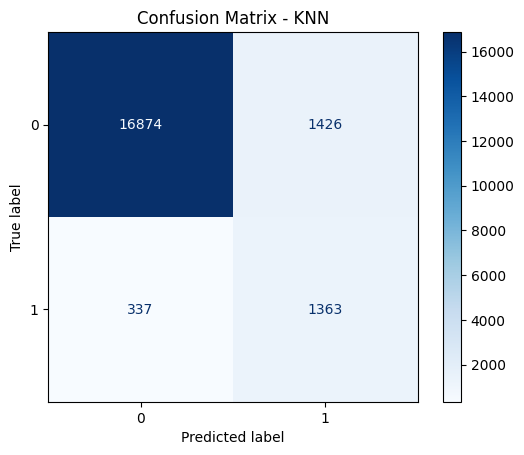

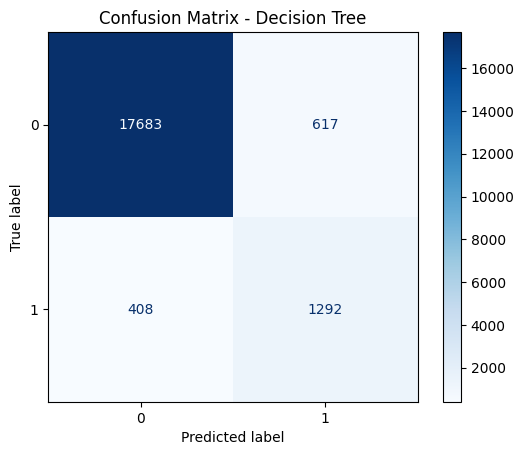

               Accuracy  Precision    Recall        F1  Train Time (s)
SVM             0.89225   0.436506  0.920000  0.592088     4143.772933
Random Forest   0.95760   0.753874  0.744118  0.748964       22.107634
Naive Bayes     0.45145   0.133528  0.993529  0.235417        0.047996
KNN             0.91185   0.488706  0.801765  0.607262        0.460987
Decision Tree   0.94875   0.676794  0.760000  0.715988        0.376980


In [5]:
for name, model in models.items():
    start = time.time()
    model.fit(X_train_res, y_train_res)
    end = time.time()

    y_pred = model.predict(X_test_scaled)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Train Time (s)": end - start
    }

    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, cmap="Blues"
    )
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()

df_results = pd.DataFrame(results).T
print(df_results)

<Figure size 1000x600 with 0 Axes>

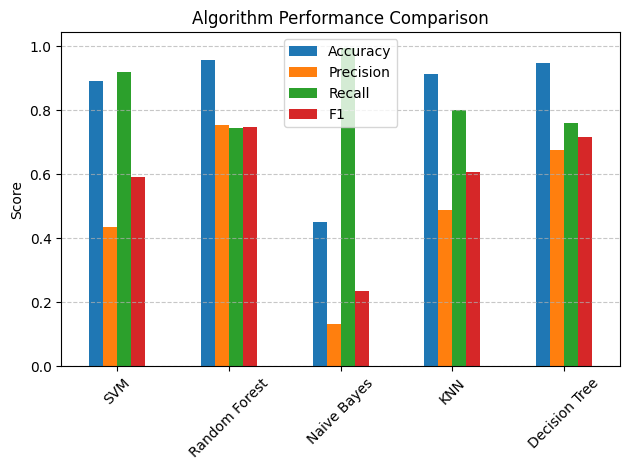

In [6]:
plt.figure(figsize=(10, 6))
df_results[["Accuracy", "Precision", "Recall", "F1"]].plot(kind="bar")
plt.title("Algorithm Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()